<a href="https://colab.research.google.com/github/VictorLC28/Investigaci-n-de-Operaciones-I/blob/main/Simulacion_modelos_de_colas_MM1_MMs_y_MMsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación práctica de un Modelo M / M / 1
El ejemplo de un problema de esta indole es el siguiente: Suponga que en una sucursal bancaria, los clientes llegan para ser atendidos en el mostrador principal de forma que sonatendido por orden de llegada. Hay un único cajero disponible. En promedio, 10 clientes llegan por hora (tasa de llegada).
y el cajero tarda, en promedio, 4 minutos en atender a cada cliente (tasa de servicio).

Evaluar el desempeño del sistema en un día típico (8 horas) y obtener métricas clave como:
* Utilización del servidor.
* Tiempo promedio de espera en la cola.
* Número promedio de clientes en la cola.

Dado que se distribuye de la forma M / M / 1, ya conocemos como calcular los parametros para este problema, por tanto tenemos la siguiente implementación:
* Tasa de llegada (𝜆)= 10 clientes/hora = 10/60 clientes/minuto
* Tasa de servicio (μ) = 1 cliente cada 4 minutos = 1/4 clientes/minuto
* Tiempo total de simulación: 8 horas = 8x60 = 480 minutos

Métricas del sistema de atención al cliente en el banco:
Utilización del servidor (rho): 0.67
Clientes promedio en cola (Lq): 1.33
Clientes promedio en el sistema (Ls): 2.00
Tiempo promedio en cola (Wq): 8.00
Tiempo promedio en el sistema (Ws): 12.00


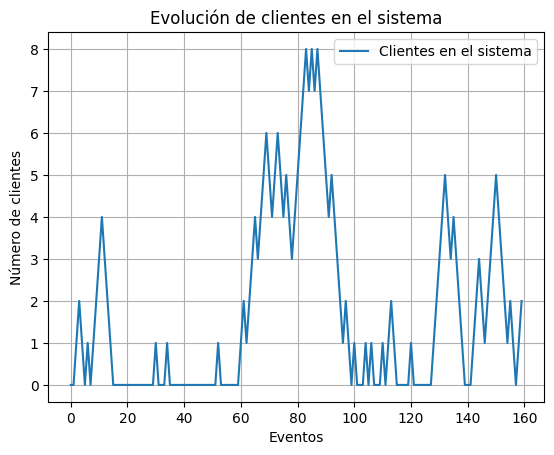

In [ ]:
import random
import matplotlib.pyplot as plt


class MM1Queue:
    def __init__(self, arrival_rate, service_rate, simulation_time):
        self.arrival_rate = arrival_rate  # Tasa de llegada (lambda)
        self.service_rate = service_rate  # Tasa de servicio (mu)
        self.simulation_time = simulation_time  # Tiempo de simulación
        self.clock = 0  # Reloj del sistema
        self.queue = []  # Cola de clientes
        self.server_busy = False  # Estado del servidor
        self.num_in_queue = 0  # Número de clientes en la cola
        self.total_clients = 0  # Total de clientes atendidos
        self.total_wait_time = 0  # Tiempo total de espera
        self.total_service_time = 0  # Tiempo total de servicio
        self.num_clients_in_system = []  # Número de clientes en el sistema (para análisis)

    def exponential(self, rate):
        """Genera un tiempo aleatorio con distribución exponencial."""
        return random.expovariate(rate)

    def run_simulation(self):
        """Corre la simulación de la cola M/M/1."""
        next_arrival = self.exponential(self.arrival_rate)
        next_departure = float('inf')

        while self.clock < self.simulation_time:
            if next_arrival < next_departure:
                # Manejo de llegada
                self.clock = next_arrival
                self.num_clients_in_system.append(self.num_in_queue)
                self.total_clients += 1
                if self.server_busy:
                    self.queue.append(self.clock)
                    self.num_in_queue += 1
                else:
                    self.server_busy = True
                    next_departure = self.clock + self.exponential(self.service_rate)
                next_arrival = self.clock + self.exponential(self.arrival_rate)
            else:
                # Manejo de salida
                self.clock = next_departure
                self.num_clients_in_system.append(self.num_in_queue)
                if self.num_in_queue > 0:
                    arrival_time = self.queue.pop(0)
                    self.num_in_queue -= 1
                    wait_time = self.clock - arrival_time
                    self.total_wait_time += wait_time
                    next_departure = self.clock + self.exponential(self.service_rate)
                else:
                    self.server_busy = False
                    next_departure = float('inf')
                self.total_service_time += self.clock

    def calculate_metrics(self):
        """Calcula métricas clave del sistema."""
        rho = self.arrival_rate / self.service_rate  # Utilización del servidor
        lq = rho**2 / (1 - rho)  # Clientes promedio en cola
        ls = lq + rho  # Clientes promedio en el sistema
        wq = lq / self.arrival_rate  # Tiempo promedio en cola
        ws = ls / self.arrival_rate  # Tiempo promedio en el sistema

        metrics = {
            "Utilización del servidor (rho)": rho,
            "Clientes promedio en cola (Lq)": lq,
            "Clientes promedio en el sistema (Ls)": ls,
            "Tiempo promedio en cola (Wq)": wq,
            "Tiempo promedio en el sistema (Ws)": ws,
        }
        return metrics

    def plot_results(self):
        """Grafica el número de clientes en el sistema durante el tiempo de simulación."""
        plt.plot(self.num_clients_in_system, label="Clientes en el sistema")
        plt.xlabel("Eventos")
        plt.ylabel("Número de clientes")
        plt.title("Evolución de clientes en el sistema")
        plt.legend()
        plt.grid(True)
        plt.show()


# Parámetros del sistema para el banco
arrival_rate = 10 / 60  # Tasa de llegada (clientes por minuto)
service_rate = 1 / 4  # Tasa de servicio (clientes por minuto)
simulation_time = 8 * 60  # Tiempo total de simulación (minutos)

# Inicialización y ejecución
queue = MM1Queue(arrival_rate, service_rate, simulation_time)
queue.run_simulation()
metrics = queue.calculate_metrics()

# Mostrar métricas
print("Métricas del sistema de atención al cliente en el banco:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Graficar resultados
queue.plot_results()


Una vez que obtenemos nuestros datos, recordemos que:
* Utilización del servidor (ρ): Proporción del tiempo que el cajero está ocupado.
* Clientes promedio en la cola ($L_{q}$): Cuántos clientes están esperando en promedio.
* Tiempo promedio en la cola ($W_q$): Tiempo que un cliente típico pasa esperando ser atendido.
* Clientes promedio en el sistema ($L_s$): Número promedio de clientes en el sistema (en cola o siendo atendidos).
* Tiempo promedio en el sistema ($W_s$): Tiempo total que un cliente pasa en el banco.

# Simulación práctica de un Modelo M / M / s
Un banco tiene 3 cajeros disponibles para atender a los clientes. En dicho banco 15 clientes llegan por hora (tasa de llegada), además, cada cajero tarda, en promedio, 6 minutos en atender a un cliente (tasa de servicio). Trata de evaluar el desempeño del sistema en un día típico (8 horas) y calcular métricas como:
* Utilización promedio del sistema.
* Tiempo promedio de espera en la cola.
* Número promedio de clientes en la cola y el sistema.

Dado que ahora tenemos un problema  de la forma M / M /s , entonces requerimos los siguientes paramentros base:
* Tasa de llegada: 15/60 = 0.25 clientes/minuto.
* Tasa de servicio: 1/6 = 0.1667 clientes/minuto
* Tiempo de simulación: 8 horas= 8x60 =480 minutos
* Número de servidores: 3.

Métricas del sistema de atención al cliente con múltiples cajeros:
Utilización promedio del sistema (rho): 0.97
Clientes promedio en cola (Lq): 1.57
Clientes promedio en el sistema (Ls): 4.47
Tiempo promedio en cola (Wq): 3.25
Tiempo promedio en el sistema (Ws): 9.25


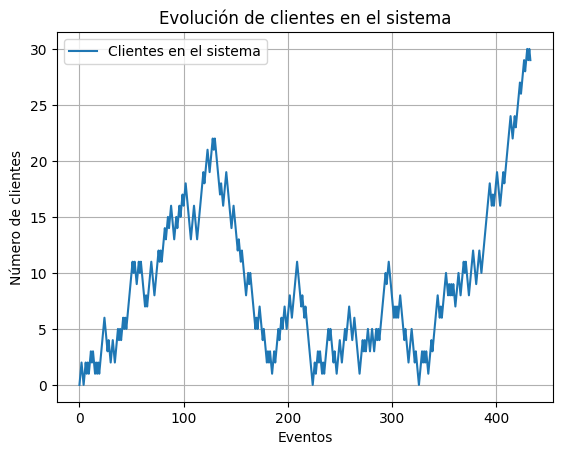

In [9]:
import random
import matplotlib.pyplot as plt
from math import factorial


class MMSQueue:
    def __init__(self, arrival_rate, service_rate, num_servers, simulation_time):
        self.arrival_rate = arrival_rate  # Tasa de llegada (lambda)
        self.service_rate = service_rate  # Tasa de servicio (mu)
        self.num_servers = num_servers  # Número de servidores (s)
        self.simulation_time = simulation_time  # Tiempo de simulación
        self.clock = 0  # Reloj del sistema
        self.queue = []  # Cola de clientes
        self.servers = [False] * num_servers  # Estado de los servidores
        self.num_in_queue = 0  # Número de clientes en la cola
        self.total_clients = 0  # Total de clientes atendidos
        self.total_wait_time = 0  # Tiempo total de espera
        self.total_service_time = 0  # Tiempo total de servicio
        self.num_clients_in_system = []  # Número de clientes en el sistema (para análisis)

    def exponential(self, rate):
        """Genera un tiempo aleatorio con distribución exponencial."""
        return random.expovariate(rate)

    def run_simulation(self):
        """Corre la simulación de la cola M/M/s."""
        next_arrival = self.exponential(self.arrival_rate)
        next_departure = [float('inf')] * self.num_servers

        while self.clock < self.simulation_time:
            # Encuentra el próximo evento: llegada o salida
            min_departure = min(next_departure)
            if next_arrival < min_departure:
                # Manejo de llegada
                self.clock = next_arrival
                self.num_clients_in_system.append(self.num_in_queue + sum(self.servers))
                self.total_clients += 1
                if any(not busy for busy in self.servers):  # Si hay un servidor disponible
                    server_index = self.servers.index(False)
                    self.servers[server_index] = True
                    next_departure[server_index] = self.clock + self.exponential(self.service_rate)
                else:  # Si todos los servidores están ocupados
                    self.queue.append(self.clock)
                    self.num_in_queue += 1
                next_arrival = self.clock + self.exponential(self.arrival_rate)
            else:
                # Manejo de salida
                self.clock = min_departure
                server_index = next_departure.index(min_departure)
                self.num_clients_in_system.append(self.num_in_queue + sum(self.servers))
                if self.num_in_queue > 0:  # Si hay clientes esperando
                    arrival_time = self.queue.pop(0)
                    self.num_in_queue -= 1
                    wait_time = self.clock - arrival_time
                    self.total_wait_time += wait_time
                    next_departure[server_index] = self.clock + self.exponential(self.service_rate)
                else:  # Si no hay clientes en la cola
                    self.servers[server_index] = False
                    next_departure[server_index] = float('inf')
                self.total_service_time += self.clock

    def calculate_metrics(self):
        """Calcula métricas clave del sistema."""
        rho = self.arrival_rate / (self.num_servers * self.service_rate)  # Utilización promedio
        if rho >= 1:
            raise ValueError("El sistema no es estable (rho >= 1).")

        # Calculando probabilidades y métricas usando fórmulas de M/M/s
        p0 = self.calculate_p0(rho)
        lq = (p0 * (rho ** self.num_servers) * self.arrival_rate * self.service_rate) / (
            factorial(self.num_servers) * ((1 - rho) ** 2)
        )
        ls = lq + (self.arrival_rate / self.service_rate)
        wq = lq / self.arrival_rate
        ws = ls / self.arrival_rate

        metrics = {
            "Utilización promedio del sistema (rho)": rho,
            "Clientes promedio en cola (Lq)": lq,
            "Clientes promedio en el sistema (Ls)": ls,
            "Tiempo promedio en cola (Wq)": wq,
            "Tiempo promedio en el sistema (Ws)": ws,
        }
        return metrics

    def calculate_p0(self, rho):
        """Calcula la probabilidad de que no haya clientes en el sistema (P0)."""
        sum_terms = sum((rho ** n) / factorial(n) for n in range(self.num_servers))
        last_term = ((rho ** self.num_servers) / factorial(self.num_servers)) * (1 / (1 - rho))
        return 1 / (sum_terms + last_term)

    def plot_results(self):
        """Grafica el número de clientes en el sistema durante el tiempo de simulación."""
        plt.plot(self.num_clients_in_system, label="Clientes en el sistema")
        plt.xlabel("Eventos")
        plt.ylabel("Número de clientes")
        plt.title("Evolución de clientes en el sistema")
        plt.legend()
        plt.grid(True)
        plt.show()


# Parámetros del sistema para el banco
arrival_rate = 29 / 60  # Tasa de llegada (clientes por minuto)
service_rate = 1 / 6  # Tasa de servicio (clientes por minuto por servidor)
num_servers = 3  # Número de cajeros
simulation_time = 8 * 60  # Tiempo total de simulación (minutos)

# Inicialización y ejecución
queue = MMSQueue(arrival_rate, service_rate, num_servers, simulation_time)
queue.run_simulation()
metrics = queue.calculate_metrics()

# Mostrar métricas
print("Métricas del sistema de atención al cliente con múltiples cajeros:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

# Graficar resultados
queue.plot_results()


Supongamos ahora que todos los dias 15 del mes la afluencia del banco pasa a 40 clientes por hora; queda claro que la tasa de servicio debe seguir siendo la misma para brindar la misma calidad de servicio, entonces ¿Como modifica en esto nuestro modelo?.

Dado que ahora la tasa de llegada ahora cambia a 40 clientes por hora es deci (λ= 40/60 = 0.6667 clientes/minuto), manteniendo la tasa de servicio por servidor (𝜇=1/6 clientes/minuto) y el número de servidores (s = 3), notamos que:
$$\rho=\frac{\lambda}{s \cdot \mu}=\frac{0.66667}{3 \cdot 0.16667}=1.3333$$
Entonces podemos ver que nuestro sistema no es estable, pues $\rho > 1$.

Esto indica que los servidores no pueden atender a los clientes a la velocidad suficiente para evitar que la cola no crezca indefinidamente. Los clientes llegarían más rápido de lo que pueden ser atendidos, causando tiempos de espera extremadamente altos.

Una solucion falctible, dado que no queremos aumentar la tasa de servicio sería entonces aumentar el número de servidores, para ello vemos que:
$$\frac{\lambda}{s \cdot \mu} < 1 \rightarrow s > \frac{\lambda}{\mu} = \frac{0.6667}{0.16667} ≈ 4$$
Entonces tenemos que una solución factible es aumentar los servidores a por lo menos 5 (ya que con 4 tampoco es posible, pues ρ=1).

# Simulación práctica de un modelo M/M/s/k

Un banco tiene 3 cajeros disponibles y puede acomodar un máximo de 10 clientes en el sistema (incluyendo los que están siendo atendidos y los que esperan en la cola). Si llegan 29 clientes por hora y cada cajero puede atender en promedio a un cliente cada 6 minutos. Evaluar el desempeño del sistema y calcular métricas como:
* Probabilidad de rechazo (bloqueo de clientes por límite de capacidad).
* Número promedio de clientes en la cola y en el sistema.
* Tiempo promedio de espera.

En nuestro caso, tenemos que como valores significativos:

* Tasa de llegada (𝜆)= 29 clientes/hora = 29/60 clientes/minuto
* Tasa de servicio (μ) = 1 cliente cada 6 minutos = 1/6 clientes/minuto
* El sistema no permite a más de 10 clientes en total (k=10)
* Tiempo total de simulación: 8 horas = 8x60 = 480 minutos

Métricas del sistema de atención al cliente con capacidad limitada:
Utilización promedio del sistema (rho): 0.9667
Clientes promedio en cola (Lq): 0.0397
Clientes promedio en el sistema (Ls): 2.9396
Tiempo promedio en cola (Wq): 0.0821
Tiempo promedio en el sistema (Ws): 6.0820
Probabilidad de bloqueo (Pk): 0.0000


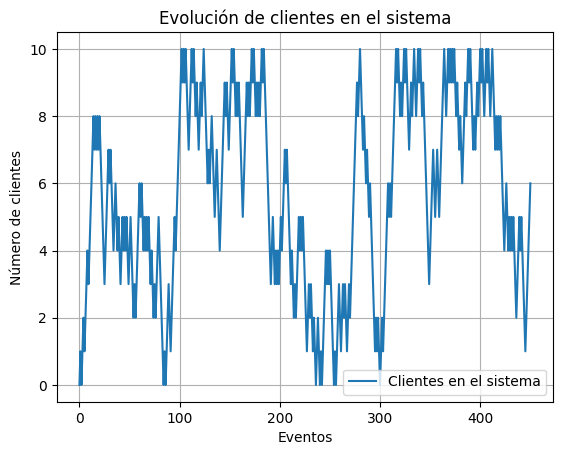

In [16]:
import random
import matplotlib.pyplot as plt
from math import factorial, pow


class MMSKQueue:
    def __init__(self, arrival_rate, service_rate, num_servers, max_capacity, simulation_time):
        self.arrival_rate = arrival_rate  # Tasa de llegada (lambda)
        self.service_rate = service_rate  # Tasa de servicio (mu)
        self.num_servers = num_servers  # Número de servidores (s)
        self.max_capacity = max_capacity  # Capacidad máxima del sistema (k)
        self.simulation_time = simulation_time  # Tiempo de simulación
        self.clock = 0  # Reloj del sistema
        self.queue = []  # Cola de clientes
        self.servers = [False] * num_servers  # Estado de los servidores
        self.num_in_system = 0  # Número de clientes en el sistema
        self.total_clients = 0  # Total de clientes que llegaron
        self.blocked_clients = 0  # Clientes rechazados
        self.total_wait_time = 0  # Tiempo total de espera
        self.num_clients_in_system = []  # Número de clientes en el sistema para análisis

    def exponential(self, rate):
        """Genera un tiempo aleatorio con distribución exponencial."""
        return random.expovariate(rate)

    def run_simulation(self):
        """Corre la simulación de la cola M/M/s/k."""
        next_arrival = self.exponential(self.arrival_rate)
        next_departure = [float('inf')] * self.num_servers

        while self.clock < self.simulation_time:
            # Encuentra el próximo evento: llegada o salida
            min_departure = min(next_departure)
            if next_arrival < min_departure:
                # Manejo de llegada
                self.clock = next_arrival
                if self.num_in_system < self.max_capacity:  # Si hay espacio en el sistema
                    self.num_clients_in_system.append(self.num_in_system)
                    self.total_clients += 1
                    self.num_in_system += 1
                    if any(not busy for busy in self.servers):  # Si hay un servidor disponible
                        server_index = self.servers.index(False)
                        self.servers[server_index] = True
                        next_departure[server_index] = self.clock + self.exponential(self.service_rate)
                    else:  # Si todos los servidores están ocupados
                        self.queue.append(self.clock)
                else:  # Cliente rechazado
                    self.blocked_clients += 1
                next_arrival = self.clock + self.exponential(self.arrival_rate)
            else:
                # Manejo de salida
                self.clock = min_departure
                server_index = next_departure.index(min_departure)
                self.num_clients_in_system.append(self.num_in_system)
                self.num_in_system -= 1
                if self.queue:  # Si hay clientes en la cola
                    arrival_time = self.queue.pop(0)
                    wait_time = self.clock - arrival_time
                    self.total_wait_time += wait_time
                    next_departure[server_index] = self.clock + self.exponential(self.service_rate)
                else:  # Si no hay clientes en la cola
                    self.servers[server_index] = False
                    next_departure[server_index] = float('inf')

    def calculate_metrics(self):
        """Calcula métricas clave del sistema."""
        rho = self.arrival_rate / (self.num_servers * self.service_rate)  # Utilización promedio
        if rho >= 1:
            raise ValueError("El sistema no es estable (rho >= 1).")

        # Cálculo de P0
        p0 = self.calculate_p0(rho)
        pn = lambda n: (rho ** n / factorial(n)) * p0 if n < self.num_servers else (
            (rho ** n / (factorial(self.num_servers) * (self.num_servers ** (n - self.num_servers)))) * p0
        )

        # Probabilidad de bloqueo (Pn cuando n = k)
        pk = pn(self.max_capacity)
        # Clientes promedio en cola
        lq = sum((n - self.num_servers) * pn(n) for n in range(self.num_servers, self.max_capacity + 1))
        # Clientes promedio en el sistema
        ls = lq + (self.arrival_rate / self.service_rate) * (1 - pk)
        # Tiempo promedio en cola
        wq = lq / self.arrival_rate
        # Tiempo promedio en el sistema
        ws = ls / self.arrival_rate

        metrics = {
            "Utilización promedio del sistema (rho)": rho,
            "Clientes promedio en cola (Lq)": lq,
            "Clientes promedio en el sistema (Ls)": ls,
            "Tiempo promedio en cola (Wq)": wq,
            "Tiempo promedio en el sistema (Ws)": ws,
            "Probabilidad de bloqueo (Pk)": pk,
        }
        return metrics

    def calculate_p0(self, rho):
        """Calcula la probabilidad de que no haya clientes en el sistema (P0)."""
        sum_terms = sum((rho ** n) / factorial(n) for n in range(self.num_servers))
        last_term = ((rho ** self.num_servers) / factorial(self.num_servers)) * (
            1 - pow(rho / self.num_servers, self.max_capacity - self.num_servers + 1)
        ) / (1 - rho / self.num_servers)
        return 1 / (sum_terms + last_term)

    def plot_results(self):
        """Grafica el número de clientes en el sistema durante el tiempo de simulación."""
        plt.plot(self.num_clients_in_system, label="Clientes en el sistema")
        plt.xlabel("Eventos")
        plt.ylabel("Número de clientes")
        plt.title("Evolución de clientes en el sistema")
        plt.legend()
        plt.grid(True)
        plt.show()


# Parámetros del sistema para el banco
arrival_rate = 29 / 60  # Tasa de llegada (clientes por minuto)
service_rate = 1 / 6  # Tasa de servicio (clientes por minuto por servidor)
num_servers = 3  # Número de cajeros
max_capacity = 10  # Capacidad máxima del sistema (clientes en total)
simulation_time = 8 * 60  # Tiempo total de simulación (minutos)

# Inicialización y ejecución
queue = MMSKQueue(arrival_rate, service_rate, num_servers, max_capacity, simulation_time)

try:
    queue.run_simulation()
    metrics = queue.calculate_metrics()
    print("Métricas del sistema de atención al cliente con capacidad limitada:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    queue.plot_results()
except ValueError as e:
    print(f"Error: {e}")

